# Giải bài toán

In [1]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        problem = []
        for line in file:
            if line.strip():
                row = list(map(int, line.split()))
                problem.append(row)
    return problem
problem3 = read_file('data/42Cities-699.txt')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def visualize(problem, route, draw_weight=False, initial=False):
    n_cities = len(problem)
    
    # Create a graph
    G = nx.Graph()
    for i in range(n_cities):
        for j in range(i + 1, n_cities):
            G.add_edge(i, j, weight=problem[i][j])

    pos = nx.circular_layout(G, scale=2)

    plt.figure(figsize=(14, 7))
    if initial:
        plt.subplot(121)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        if draw_weight:
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.5)
        plt.title("Initial Graph")

    # Highlight the best route and remove non-route edges for clarity
    route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
    route_edges.append((route[-1], route[0]))  # Complete the cycle

    # Remove non-route edges
    non_route_edges = [edge for edge in G.edges() if edge not in route_edges and (edge[1], edge[0]) not in route_edges]
    G.remove_edges_from(non_route_edges)

    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='r', width=2)
    if draw_weight:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.6)
    plt.title(f"Best Route\n{route}")

    plt.show()

In [3]:
# problem = problem1
# distances, route, fitness = solve(problem, generations=200, mutation_rate=0.05, population_size=200)

# print(distances)
# print(route)

In [4]:
# problem = problem2
# distances, route, fitness = solve(problem, generations=200, mutation_rate=0.05, population_size=200)

# print(distances)
# print(route)

In [5]:
# problem = problem3
# distances, route, fitness = solve(problem, generations=200, mutation_rate=0.05, population_size=200)

# print(distances)
# print(route)

In [11]:
problem = problem3
distances, route, fitness = solve(problem, generations=500, mutation_rate=0.01, population_size=200, 
                                    selection_algorithm='rank')
# while distances != 1194:
#     distances, route, fitness = solve(problem, generations=200, mutation_rate=0.005, population_size=200, 
#                                       selection_algorithm = 'roulette_wheel')
print(distances)
print(route)

941
[0, 2, 7, 23, 22, 15, 17, 14, 13, 12, 11, 10, 21, 16, 18, 19, 20, 27, 28, 29, 30, 25, 26, 24, 9, 8, 6, 4, 1, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 5, 3, 0]


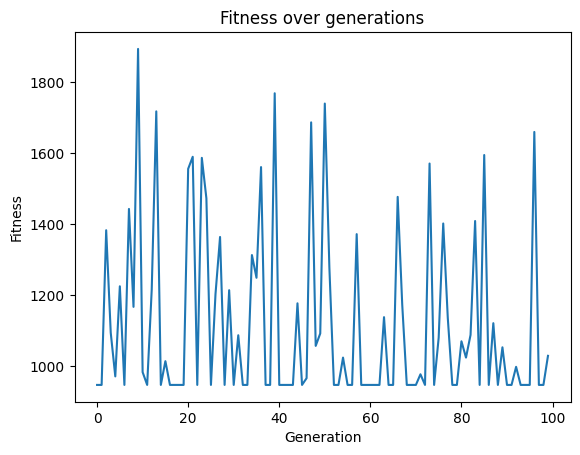

In [7]:
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()
plot_fitness(fitness)

## Note: mỗi hàm selection, crossover, mutate sẽ làm khoảng 2-3 thuật toán nữa, cụ thể: 
### Selection: 
* Roulette wheel selection
* Tournament Selection
* Rank Selection
* Elitism Selection (đã làm)
### Crossover
* Single-Point Crossover
* Two-Point Crossover
* Uniform crossover 
* Order Crossover (đã làm)
### Mutation
* Scramble Mutation
* Inversion Mutation
* Swap Mutation (đã làm)
### Làm vào file GA.py như mẫu

## Có 2 bài test case mẫu (problem 2 và problem 4) đã có đáp án, dự kiến sẽ test thuật toán trên đó. Dùng hàm plot_fitness đã định nghĩa để trực quan hóa độ chính xác của thuật toán. Code thí nghiệm ở file Experiment.ipynb. Đưa ra những kết luận ngay trong file, làm tiền đề cho tiểu luận. Về thí nghiệm như nào sẽ bàn bạc sau.